# Plot Cole-Cole in both frequency-domain and time-domain

**Author**: Seogi Kang

This notebook shows how we calculated Cole-Cole function both in frequency-domain and time-domain.   
Particularly for the time-domain case, we plotted impulse-conductivity function (shown as Eq. 1 in Kang and Oldenburg (2019)). This notebook was used to produce Figure 1 in Kang and Oldenburg (2019). 

In [1]:
%pylab inline
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


## Compute freqeuncy-domain Cole-Cole function

In [2]:
f = np.logspace(-7, 4)
def ColeColeSeigel(f, sigmaInf, eta, tau, c):
    w = 2*np.pi*f
    return sigmaInf*(1 - eta/(1 + (1j*w*tau)**c))
sigma_sulfide = ColeColeSeigel(f, 1., 0.4, 1., 0.4)
sigma_graphite= ColeColeSeigel(f, 1., 0.4, 10., 0.4)

## Transform them into time-domain

In [3]:
import DigFilter
time = np.logspace(-3,np.log10(100), 41)
wt, tbase, omega_int = DigFilter.setFrequency(time)
frequency = omega_int / (2*np.pi)
sigma_freq_sulfide = ColeColeSeigel(frequency, 1., 0.4, 1., 0.4)
sigma_time_sulfide = DigFilter.transFiltImpulse(sigma_freq_sulfide, wt, tbase, omega_int, time, tol=1e-12)

sigma_freq_graphite = ColeColeSeigel(frequency, 1., 0.4, 10., 0.4)
sigma_time_graphite = DigFilter.transFiltImpulse(sigma_freq_graphite, wt, tbase, omega_int, time, tol=1e-12)

In [4]:
fig_dir = './figures'

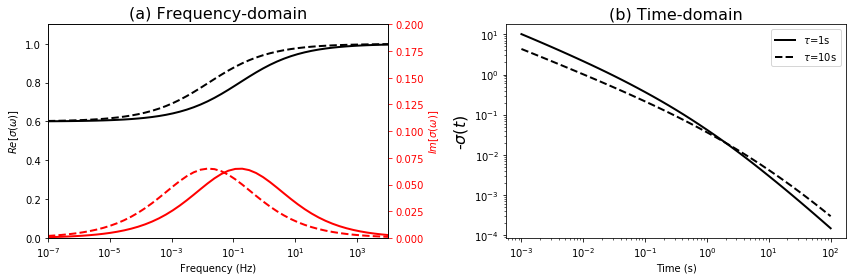

In [5]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)
ax_1 = ax.twinx()
ax.semilogx(f, sigma_sulfide.real, 'k', lw=2)
ax_1.semilogx(f, sigma_sulfide.imag, 'r', lw=2)
ax.semilogx(f, sigma_graphite.real, 'k--', lw=2)
ax_1.semilogx(f, sigma_graphite.imag, 'r--', lw=2)
ax.set_ylabel('$Re[\sigma(\omega)]$', color='k')
ax_1.set_ylabel('$Im[\sigma(\omega)]$', color='r')

ax_1.tick_params('y', colors='r')
ax.set_xlim(f.min(), f.max())
ax.set_xlabel("Frequency (Hz)")
ax_1.set_ylim(0, 0.2)
ax.set_ylim(0, 1.1)
ax2.loglog(time, -sigma_time_sulfide, 'k', lw=2)
ax2.loglog(time, -sigma_time_graphite, 'k--', lw=2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("-$\sigma(t)$", fontsize=16)
ax.set_title("(a) Frequency-domain", fontsize=16)
ax2.set_title("(b) Time-domain", fontsize=16)
ax2.legend(("$\\tau$=1s", "$\\tau$=10s"))
plt.tight_layout()
# fig.savefig(fig_dir+"complex_conductivity", dpi=200)